# Final Project



In [82]:
import yfinance as yf

Implement:
- matrix form autoregression
- engle granger procedure for error correction model
- mean reversion evaluation (theta, half life)
- optimal Z* for trading entry points

### Step 1
Recode regression estimation in matrix form as an exercise. Can implement Vector Autoregression specification tests, which are (a) stability check with eigenvalues, and (b) identifying optimal lag p with AIC BIC tests. However, these apply only for structural models between stationary changes; we are not forecasting returns in this project.

In [83]:
ford = yf.Ticker("Ford").history(period="10y")

In [84]:
ford

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-01-12 00:00:00-05:00,12.50,12.50,11.10,11.20,9300,0.0,0.0
2015-01-13 00:00:00-05:00,11.30,12.30,11.30,11.90,110,0.0,0.0
2015-01-14 00:00:00-05:00,11.30,11.50,10.50,10.60,3020,0.0,0.0
2015-01-15 00:00:00-05:00,11.20,11.20,10.60,10.70,2070,0.0,0.0
2015-01-16 00:00:00-05:00,10.60,11.00,9.00,9.80,7680,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-03 00:00:00-05:00,5.05,5.31,4.90,5.27,19300,0.0,0.0
2025-01-06 00:00:00-05:00,5.32,5.59,5.29,5.52,16000,0.0,0.0
2025-01-07 00:00:00-05:00,5.51,5.51,5.04,5.29,10600,0.0,0.0


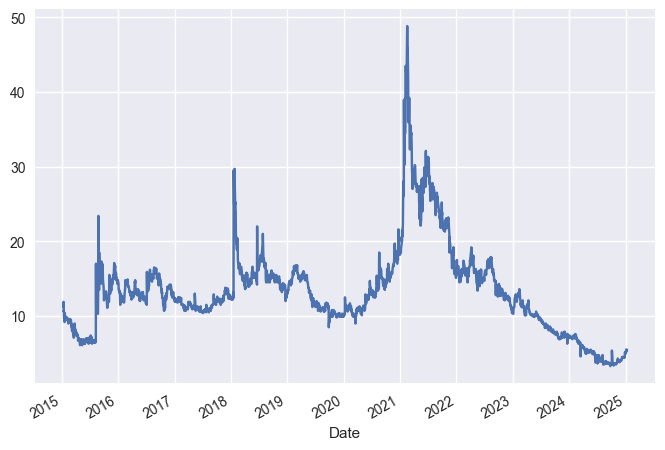

In [85]:
ford["Close"].plot(kind="line");

In [86]:
gm = yf.Ticker("GM").history(period="10y")

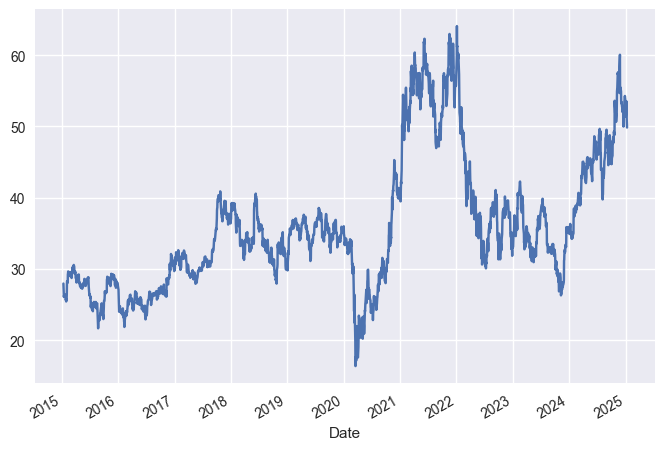

In [87]:
gm.Close.plot(kind="line");

In [88]:
from statsmodels.tsa.api import VAR
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

In [89]:
from scipy.stats import linregress

In [90]:
def regress_for_residual(ticker_1, ticker_2, output_regression=False):
    result = linregress(ticker_2, ticker_1) # TODO: CODE MATRIX FORM ESTIMATION FOR REGRESSION COEFFICIENTS

    grad = result.slope
    intercept = result.intercept

    print(f"Gradient: {grad}\nIntercept: {intercept}")

    residual = ticker_1 - ticker_2 * grad - intercept

    residual.plot(kind="line")

    if output_regression:
        return residual.rename("Residual"), grad, intercept
    
    return residual.rename("Residual")

In [91]:
"""
ticker_1_str = "V"
ticker_2_str = "MA"
start_date = "2016-01-01"
end_date = "2024-11-29"
"""

ticker_1_str = "V"
ticker_2_str = "MA"
start_date = "2020-01-01"
end_date = "2024-11-29"
T = pd.to_datetime(end_date) - pd.to_datetime(start_date)


ticker_1 = yf.Ticker(ticker_1_str)
ticker_1 = ticker_1.history(start=start_date, end=end_date, interval="1d").Close
ticker_1 = ticker_1.rename(ticker_1_str)

ticker_2 = yf.Ticker(ticker_2_str)
ticker_2 = ticker_2.history(start=start_date, end=end_date, interval="1d").Close
ticker_2 = ticker_2.rename(ticker_2_str)

# NORMALISATION COMMENT OUT AS NEEDED
ticker_1 = ticker_1 / ticker_1[0]
ticker_2 = ticker_2 / ticker_2[0]


C:\Users\wqwph\AppData\Local\Temp\ipykernel_98112\3165175897.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticker_1 = ticker_1 / ticker_1[0]
C:\Users\wqwph\AppData\Local\Temp\ipykernel_98112\3165175897.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticker_2 = ticker_2 / ticker_2[0]


In [92]:
# ticker_1.to_csv("V_data.csv")
# ticker_2.to_csv("MA_data.csv")

In [93]:
type(ticker_1)

pandas.core.series.Series

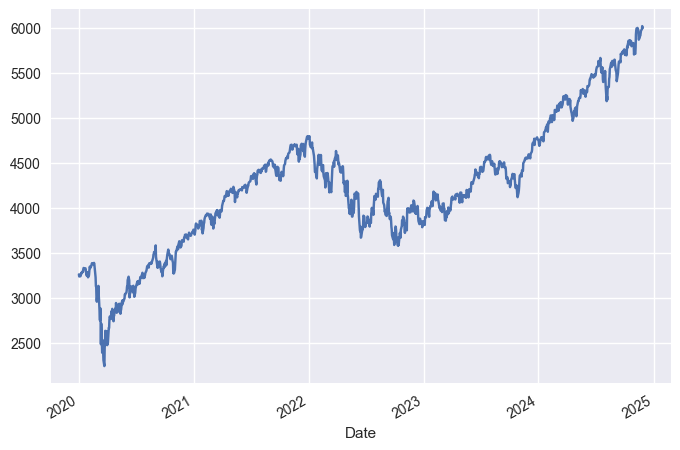

In [94]:
# s&p500 benchmark
benchmark_str = "^SPX"
benchmark = yf.Ticker(benchmark_str)
benchmark = benchmark.history(start=start_date, end=end_date, interval="1d").Close
benchmark = benchmark.rename(benchmark_str)
benchmark.plot();

C:\Users\wqwph\AppData\Local\Temp\ipykernel_98112\2617597068.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalised_ticker_1 = ticker_1 / ticker_1[0]
C:\Users\wqwph\AppData\Local\Temp\ipykernel_98112\2617597068.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalised_ticker_2 = ticker_2 / ticker_2[0]


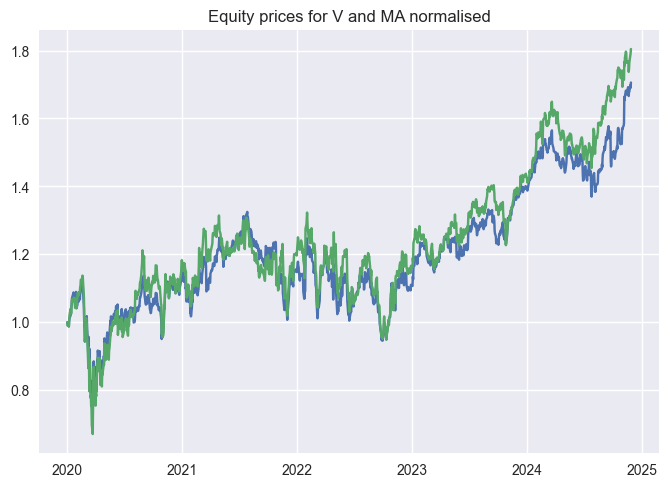

In [95]:
normalised_ticker_1 = ticker_1 / ticker_1[0]
normalised_ticker_2 = ticker_2 / ticker_2[0]
plt.plot(normalised_ticker_1, label=ticker_1_str)
plt.plot(normalised_ticker_2, label=ticker_2_str)
plt.title(f"Equity prices for {ticker_1_str} and {ticker_2_str} normalised");

In [96]:
# Simulate cointegrated spread
import numpy as np
"""
np.random.seed(42)
n = 500
x = np.cumsum(np.random.normal(0, 1, n)) + 100 # generate series X
y = x + np.random.normal(0, 1, n) + 20 # series Y with noise

ticker_1 = pd.Series(x, index=pd.date_range("2022-01-01", periods=n), name="x")
ticker_2 = pd.Series(y, index=pd.date_range("2022-01-01", periods=n), name="y")
simulated_data = pd.DataFrame({"X": x, "Y": y}, index=pd.date_range("2022-01-01", periods=n))


simulated_data.plot();
plt.show()
"""

'\nnp.random.seed(42)\nn = 500\nx = np.cumsum(np.random.normal(0, 1, n)) + 100 # generate series X\ny = x + np.random.normal(0, 1, n) + 20 # series Y with noise\n\nticker_1 = pd.Series(x, index=pd.date_range("2022-01-01", periods=n), name="x")\nticker_2 = pd.Series(y, index=pd.date_range("2022-01-01", periods=n), name="y")\nsimulated_data = pd.DataFrame({"X": x, "Y": y}, index=pd.date_range("2022-01-01", periods=n))\n\n\nsimulated_data.plot();\nplt.show()\n'

Gradient: 0.8403861290050715
Intercept: 0.16124951292351342


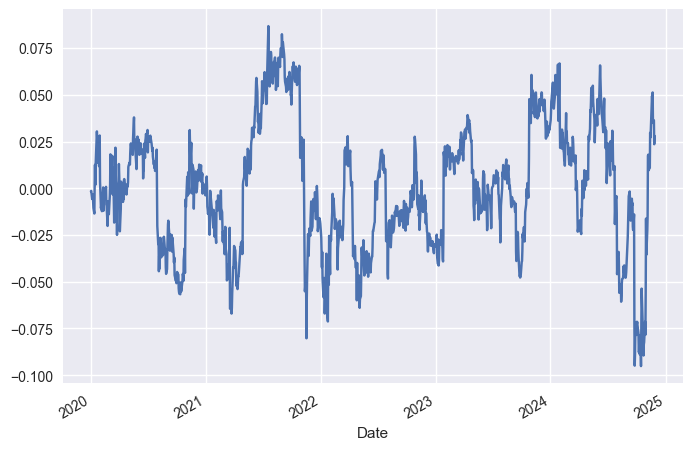

In [97]:
err, grad, intercept = regress_for_residual(ticker_1, ticker_2, output_regression=True)


In [98]:
err

Date
2020-01-02 00:00:00-05:00   -0.001636
2020-01-03 00:00:00-05:00   -0.001389
2020-01-06 00:00:00-05:00   -0.005751
2020-01-07 00:00:00-05:00   -0.005541
2020-01-08 00:00:00-05:00   -0.003314
                               ...   
2024-11-21 00:00:00-05:00    0.051260
2024-11-22 00:00:00-05:00    0.034961
2024-11-25 00:00:00-05:00    0.036335
2024-11-26 00:00:00-05:00    0.023554
2024-11-27 00:00:00-05:00    0.028055
Name: Residual, Length: 1236, dtype: float64

Gradient: 0.8403861290050715
Intercept: 0.16124951292351342


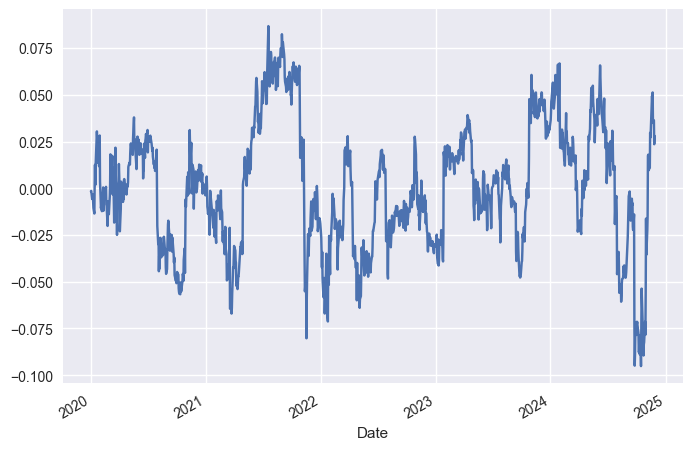

In [99]:
err_normalised, grad_normalised, intercept_normalised = regress_for_residual(normalised_ticker_1, normalised_ticker_2, output_regression=True)

0.8403861290050715 0.16124951292351342


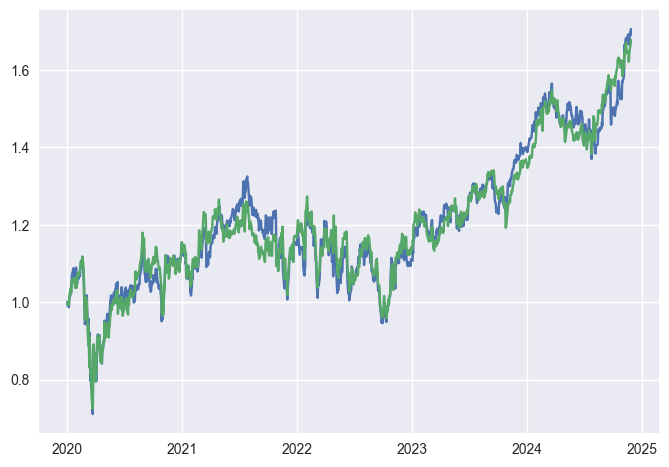

In [100]:
# with regression
print(grad, intercept)

plt.plot(ticker_1)
plt.plot(ticker_2 * grad + intercept);


In [101]:
ticker_1 - grad * ticker_2 - intercept

Date
2020-01-02 00:00:00-05:00   -0.001636
2020-01-03 00:00:00-05:00   -0.001389
2020-01-06 00:00:00-05:00   -0.005751
2020-01-07 00:00:00-05:00   -0.005541
2020-01-08 00:00:00-05:00   -0.003314
                               ...   
2024-11-21 00:00:00-05:00    0.051260
2024-11-22 00:00:00-05:00    0.034961
2024-11-25 00:00:00-05:00    0.036335
2024-11-26 00:00:00-05:00    0.023554
2024-11-27 00:00:00-05:00    0.028055
Length: 1236, dtype: float64

In [102]:
err

Date
2020-01-02 00:00:00-05:00   -0.001636
2020-01-03 00:00:00-05:00   -0.001389
2020-01-06 00:00:00-05:00   -0.005751
2020-01-07 00:00:00-05:00   -0.005541
2020-01-08 00:00:00-05:00   -0.003314
                               ...   
2024-11-21 00:00:00-05:00    0.051260
2024-11-22 00:00:00-05:00    0.034961
2024-11-25 00:00:00-05:00    0.036335
2024-11-26 00:00:00-05:00    0.023554
2024-11-27 00:00:00-05:00    0.028055
Name: Residual, Length: 1236, dtype: float64

In [103]:
from statsmodels.tsa.stattools import adfuller

In [104]:
adfuller(err, maxlag=1)

(-4.274679993589179,
 0.0004912621630870631,
 1,
 1234,
 {'1%': -3.435660336370594,
  '5%': -2.863885022214541,
  '10%': -2.568018522153254},
 -8217.591664186551)

In [105]:
b_inf = -3.33613
b_1 = -6.1101
b_2 = -6.823
b_3 = 0
T = 1234

# Critical value for n=1 -2.863911295335563
# Critical value for n=2 

crit_value = b_inf + b_1/T + b_2/T**2 + b_3/T**2
crit_value

-3.3410859393625763

In [106]:
print(f"P value is below 0.05 at {adfuller(err, maxlag=1)[1]} therefore the residual is stationary and the MA and V are cointegrated")

P value is below 0.05 at 0.0004912621630870631 therefore the residual is stationary and the MA and V are cointegrated


In [107]:
from statsmodels.tsa.stattools import coint

In [108]:
coint(ticker_1, ticker_2)

(-4.685245739542012,
 0.0005978415441565041,
 array([-3.90532992, -3.34108192, -3.04788595]))

In [109]:
adfuller(ticker_1, maxlag=1)

(-0.7840171351959311,
 0.8237718904915091,
 1,
 1234,
 {'1%': -3.435660336370594,
  '5%': -2.863885022214541,
  '10%': -2.568018522153254},
 -6300.343991046693)

In [110]:
df = pd.concat([ticker_1, ticker_2], axis=1)

"""
def create_lagged_matrix(df, lags):
    lagged_data = {}
    for lag in range(1, lags + 1):
        lagged_data[f'lag_{lag}'] = df.shift(lag)
    
    lagged_df = pd.concat(lagged_data, axis=1)
    return lagged_df  


n_lag=2
lagged_df = create_lagged_matrix(df, lags=n_lag).dropna()
# Construct X and Y matrices
X = lagged_df.to_numpy()
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add intercept
Y = df.iloc[n_lag:].to_numpy()
"""


var = VAR(df).fit(maxlags=2)
#var.summary()



c:\VirtualEnvironments\.venv_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


### Step 2: Error Correction Equations

In [111]:
dP_1 = pd.DataFrame(ticker_1).diff().dropna()

dP_2 = pd.DataFrame(ticker_2).diff().dropna()

dP_2

,MA
Date,
2020-01-03 00:00:00-05:00,-0.009756
2020-01-06 00:00:00-05:00,0.002637
2020-01-07 00:00:00-05:00,-0.003362
2020-01-08 00:00:00-05:00,0.017460
2020-01-09 00:00:00-05:00,0.013202
...,...
2024-11-21 00:00:00-05:00,0.008677
2024-11-22 00:00:00-05:00,0.019524
2024-11-25 00:00:00-05:00,0.019456


In [112]:
dP_2

,MA
Date,
2020-01-03 00:00:00-05:00,-0.009756
2020-01-06 00:00:00-05:00,0.002637
2020-01-07 00:00:00-05:00,-0.003362
2020-01-08 00:00:00-05:00,0.017460
2020-01-09 00:00:00-05:00,0.013202
...,...
2024-11-21 00:00:00-05:00,0.008677
2024-11-22 00:00:00-05:00,0.019524
2024-11-25 00:00:00-05:00,0.019456


In [113]:
#orig_err = err.copy(deep=True)
lag_1_err = err.copy(deep=True).to_frame().shift(1).dropna().add_prefix("(Lag 1, ").add_suffix(")")
lag_1_err

,"(Lag 1, Residual)"
Date,
2020-01-03 00:00:00-05:00,-0.001636
2020-01-06 00:00:00-05:00,-0.001389
2020-01-07 00:00:00-05:00,-0.005751
2020-01-08 00:00:00-05:00,-0.005541
2020-01-09 00:00:00-05:00,-0.003314
...,...
2024-11-21 00:00:00-05:00,0.044947
2024-11-22 00:00:00-05:00,0.051260
2024-11-25 00:00:00-05:00,0.034961


In [114]:
rhs = dP_2.join(lag_1_err)

rhs

,MA,"(Lag 1, Residual)"
Date,,
2020-01-03 00:00:00-05:00,-0.009756,-0.001636
2020-01-06 00:00:00-05:00,0.002637,-0.001389
2020-01-07 00:00:00-05:00,-0.003362,-0.005751
2020-01-08 00:00:00-05:00,0.017460,-0.005541
2020-01-09 00:00:00-05:00,0.013202,-0.003314
...,...,...
2024-11-21 00:00:00-05:00,0.008677,0.044947
2024-11-22 00:00:00-05:00,0.019524,0.051260
2024-11-25 00:00:00-05:00,0.019456,0.034961


In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
model = LinearRegression() #fit_intercept=False
model.fit(rhs, dP_1)

print(f"Intercept: {model.intercept_[0]}")
print(f"Coefficients: {model.coef_[0]}")


Intercept: 5.2887702964439856e-05
Coefficients: [ 0.79495181 -0.03308296]


Yes, you can use a t-statistic to check the significance of the Error Correction Term (ECT) coefficient (
𝛾
γ) in the Error Correction Model (ECM). The t-test evaluates whether the coefficient 
𝛾
γ is significantly different from 0, which is crucial for determining whether deviations from the long-term equilibrium significantly influence the short-term dynamics.



In [117]:
import statsmodels.api as sm

ecm_model = sm.OLS(dP_1, rhs).fit()

print(ecm_model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      V   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.792
Method:                 Least Squares   F-statistic:                              2349.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):                        0.00
Time:                        13:28:53   Log-Likelihood:                          4121.0
No. Observations:                1235   AIC:                                     -8238.
Df Residuals:                    1233   BIC:                                     -8228.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [118]:
ecm_model.pvalues

MA                   0.000000
(Lag 1, Residual)    0.000007
dtype: float64

In [119]:
ecm_model.pvalues < 0.05 # testing significance that both terms are statistically significant

MA                   True
(Lag 1, Residual)    True
dtype: bool

Do the reverse / opposite regression

### Step 3: Fitting spread to OU process

Use OU SDE to evaluate mean reversion

In [120]:
from statsmodels.tsa.ar_model import AutoReg

In [121]:
OU = AutoReg(err, lags=1).fit()
OU.summary()

c:\VirtualEnvironments\.venv_1\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Residual   No. Observations:                 1236
Model:                     AutoReg(1)   Log Likelihood                4113.423
Method:               Conditional MLE   S.D. of innovations              0.009
Date:                Sat, 11 Jan 2025   AIC                          -8220.845
Time:                        13:28:53   BIC                          -8205.489
Sample:                             1   HQIC                         -8215.069
                                 1236                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.327e-05      0.000      0.095      0.925      -0.000       0.001
Residual.L1     0.9662      0.007    131.114      0.000       0.952       0.981
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0350           +0.0000j            1.0350            0.0000
-----------------------------------------------------------------------------
"""

In [122]:
OU.params

const          0.000023
Residual.L1    0.966181
dtype: float64

In [123]:
C = OU.params.iloc[0]
B = OU.params.iloc[1]

print(f"Constant: {C:.6f}\nLag 1 Coeff: {B:.6f}")

Constant: 0.000023
Lag 1 Coeff: 0.966181


In [124]:
tau = 1/252 # 1/252 # 252
theta = - np.log(B) / tau

theta

8.66983073043924

In [125]:
# this indicates a half life of (in yearfrac terms)
H = np.log(2) / theta
H

0.07994933258919903

In [126]:
H / tau # half life in number of working days below

20.147231812478157

In [127]:
mu_err = C / (1-B)
mu_err

0.0006881669181756113

In [128]:
# compare mu_err to cointegrated residual intercept from OLS
intercept # why is diff so large - dont think it is comparing apples with apples
# diff looks fine when i normalise prices to both start at 1

0.16124951292351342

In [129]:
# rename OU to cointresid_AR1
sse = np.sum(OU.resid ** 2)
print(f"SSE: {sse}")

mse = sse / OU.nobs
print(f"MSE: {mse}")
print(f"MSE * tau: {mse * tau}")


SSE: 0.09250766199935177
MSE: 7.490498947315933e-05
MSE * tau: 2.9724202171888624e-07


In [130]:
from dateutil.relativedelta import relativedelta

diff_in_days =  (pd.to_datetime(end_date) - pd.to_datetime(start_date)).days

diff_in_years = diff_in_days / 365.25


In [131]:
print(f"Variance Annualised: {sse * tau}") # numerator DO I NEED T? NO JUST USE SSE * TAU
print(f"Variance Annualised dividing by T diff in years: {sse * tau / diff_in_years}") # HIS ANNUALISED VARIANCE IS TINY
print(f"Variance Annualised dividing by T diff in days: {sse * tau / diff_in_days}")



Variance Annualised: 0.0003670938968228245
Variance Annualised dividing by T diff in years: 7.473859855882756e-05
Variance Annualised dividing by T diff in days: 2.0462313089343615e-07


In [132]:
# use my own wording as this is taken from his unreleased notes
print(f"SSE first principles: {sse}") # RD
print(f"Variance annualised: {sse * tau}") # RD
print(f"Variance annualised and adjusted for number of obs: {sse * 252 / len(err)}")
print(f"Variance = MSE x tau: {mse * tau}")

SSE first principles: 0.09250766199935177
Variance annualised: 0.0003670938968228245
Variance annualised and adjusted for number of obs: 0.018860785456178517
Variance = MSE x tau: 2.9724202171888624e-07


In [169]:
print(f"helo {'cheese' if True else ''}")

helo cheese


In [133]:
numerator = sse * tau # / diff_in_years
sigma_eq = np.sqrt( numerator / (1 - np.exp(-2 * theta * tau))) # CAREFUL: DO I NEED TO PUT DIFF IN YEARS / DAYS IN NUMERATOR AS IN SLIDES (IN TUTORIAL HE DID NOT)

sigma_ou = sigma_eq * np.sqrt(2 * theta)

print(f"Diffution OU: {sigma_ou}")
print(f"Diffusion/sigma to eq: {sigma_eq}")

print(f"Standard deviation of residuals e_t: {OU.resid.std()} - notice that this is different from sigma_eq")


Diffution OU: 0.30939747849775434
Diffusion/sigma to eq: 0.07430130865344607
Standard deviation of residuals e_t: 0.008658272947711685 - notice that this is different from sigma_eq


In [134]:
# optimal bounds 
# when Z = input
z=0.3
z_upper_bounds = mu_err + z*sigma_eq
z_lower_bounds = mu_err - z*sigma_eq

print(f"Z = {z}\nUpper Bound: {z_upper_bounds}\nLower Bound:{z_lower_bounds}")

Z = 0.3
Upper Bound: 0.022978559514209435
Lower Bound:-0.02160222567785821


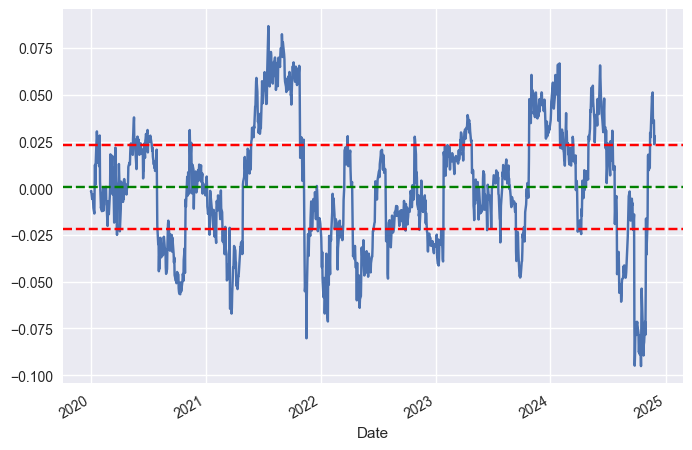

In [135]:
err.plot(kind="line")
plt.axhline(y=z_upper_bounds, color = "r", linestyle = "--")
plt.axhline(y=z_lower_bounds, color="r", linestyle="--")
plt.axhline(y=mu_err, color="green", linestyle="--")
plt.show()

In [136]:
trading_df = err.to_frame()

trading_df["mu_e"] = mu_err
trading_df["upper"] = z_upper_bounds
trading_df["lower"] = z_lower_bounds

trading_df["Z_score"] = (trading_df["Residual"] - mu_err) / sigma_eq

trading_df

,Residual,mu_e,upper,lower,Z_score
Date,,,,,
2020-01-02 00:00:00-05:00,-0.001636,0.000688,0.022979,-0.021602,-0.031275
2020-01-03 00:00:00-05:00,-0.001389,0.000688,0.022979,-0.021602,-0.027962
2020-01-06 00:00:00-05:00,-0.005751,0.000688,0.022979,-0.021602,-0.086659
2020-01-07 00:00:00-05:00,-0.005541,0.000688,0.022979,-0.021602,-0.083839
2020-01-08 00:00:00-05:00,-0.003314,0.000688,0.022979,-0.021602,-0.053864
...,...,...,...,...,...
2024-11-21 00:00:00-05:00,0.051260,0.000688,0.022979,-0.021602,0.680633
2024-11-22 00:00:00-05:00,0.034961,0.000688,0.022979,-0.021602,0.461268
2024-11-25 00:00:00-05:00,0.036335,0.000688,0.022979,-0.021602,0.479763


In [137]:
# upper breached
trading_df["upper_breach"] = trading_df["Residual"].ge(trading_df["upper"])

# lower breached
trading_df["lower_breach"] = trading_df["Residual"].le(trading_df["lower"])

# find first breach i.e. trading start # need to make into function which takes current index into account
upper_breach = trading_df["upper_breach"].idxmax()
lower_breach = trading_df["lower_breach"].idxmax()

print(upper_breach,lower_breach)
print(min(upper_breach, lower_breach))

2020-01-21 00:00:00-05:00 2020-03-25 00:00:00-04:00
2020-01-21 00:00:00-05:00


In [138]:
def check_breaches(row: pd.Series) -> str:
    """
    Check whether upper_breach or lower_breach is true
    Returns 
    - Long if lower_breach is true
    - Short if upper_breach is true
    """
    if row["lower_breach"]:
        return "Long"
    elif row["upper_breach"]:
        return "Short"
    else:
        return "Inactive"
    
def update_position(row: pd.Series, prev_position: str) -> str:
    """
    Check if residual breaches trade exit signal
    Returns:
    - Inactive if the trade is exited or position remains inactive
    - Prevailing position if nothing is breached
    """
    if (prev_position == "Long"):
        if row["Residual"] > row["upper"]:
            return "Short"
        elif row["Residual"] > row["mu_e"]:
            return "Inactive"
        else:
            return "Long"
    elif prev_position == "Short":
        if row["Residual"] < row["lower"]:
            return "Long"
        elif row["Residual"] < row["mu_e"]:
            return "Inactive"
        else:
            return "Short"
    else: # prev_position is Inactive
        return check_breaches(row)



In [139]:
position_list = [] # takes Long / Short / Inactive

for index_dt, row in trading_df.iterrows():
    # first day
    if not position_list:
        position = check_breaches(row)
    # after first day
    else:
        prev_position = position_list[-1]
        position = update_position(row, prev_position)
    
    # add to position list
    position_list.append(position)

trading_df["Position"] = position_list

trading_df["IsPositionChanged"] = trading_df["Position"].shift(1, fill_value=trading_df["Position"].head(1)) != trading_df["Position"]

first_index = trading_df.index[0]
trading_df.at[first_index,"IsPositionChanged"] = False if trading_df.at[first_index, "Position"] == "Inactive" else True

trading_df["EnterShort"] = (trading_df["IsPositionChanged"] == True) & (trading_df["Position"] == "Short")
trading_df["EnterLong"] = (trading_df["IsPositionChanged"] == True) & (trading_df["Position"] == "Long")
trading_df["ExitTrade"] = (trading_df["IsPositionChanged"] == True) & (trading_df["Position"] == "Inactive")

# EnterLong is long ticker_1 and short ticker_2
trading_df

,Residual,mu_e,upper,lower,Z_score,upper_breach,lower_breach,Position,IsPositionChanged,EnterShort,EnterLong,ExitTrade
Date,,,,,,,,,,,,
2020-01-02 00:00:00-05:00,-0.001636,0.000688,0.022979,-0.021602,-0.031275,False,False,Inactive,False,False,False,False
2020-01-03 00:00:00-05:00,-0.001389,0.000688,0.022979,-0.021602,-0.027962,False,False,Inactive,False,False,False,False
2020-01-06 00:00:00-05:00,-0.005751,0.000688,0.022979,-0.021602,-0.086659,False,False,Inactive,False,False,False,False
2020-01-07 00:00:00-05:00,-0.005541,0.000688,0.022979,-0.021602,-0.083839,False,False,Inactive,False,False,False,False
2020-01-08 00:00:00-05:00,-0.003314,0.000688,0.022979,-0.021602,-0.053864,False,False,Inactive,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-21 00:00:00-05:00,0.051260,0.000688,0.022979,-0.021602,0.680633,True,False,Short,False,False,False,False
2024-11-22 00:00:00-05:00,0.034961,0.000688,0.022979,-0.021602,0.461268,True,False,Short,False,False,False,False
2024-11-25 00:00:00-05:00,0.036335,0.000688,0.022979,-0.021602,0.479763,True,False,Short,False,False,False,False


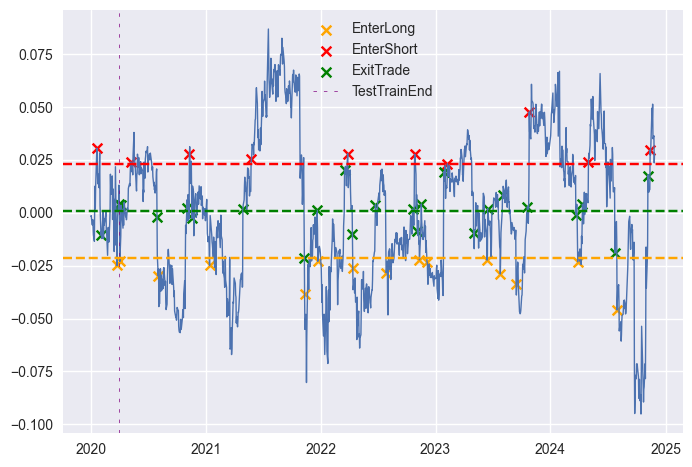

In [140]:
import datetime as dt

plt.plot(trading_df["Residual"], linewidth=1)
plt.axhline(y=z_upper_bounds, color="red", linestyle="--")
plt.axhline(y=z_lower_bounds, color="orange", linestyle="--")
plt.axhline(y=mu_err, color="g", linestyle="--")

# for trade in trading_df[trading_df["IsPositionChanged"]==True].index:
#     plt.axvline(x=trade, linewidth=0.5)
#     #plt.vlines(x=test_index_100)

enter_long = trading_df[trading_df["EnterLong"]]
enter_short = trading_df[trading_df["EnterShort"]]
exit_trade = trading_df[trading_df["ExitTrade"]]
plt.scatter(enter_long.index, enter_long.Residual, color="orange", label="EnterLong", marker="x")
plt.scatter(enter_short.index, enter_short.Residual, color="red", label="EnterShort", marker="x")
plt.scatter(exit_trade.index, exit_trade.Residual, color="green", label="ExitTrade", marker="x")


plt.axvline(x=pd.to_datetime("2020-04-01"), color="purple", linewidth=0.5, label="TestTrainEnd", linestyle=(0, (5,10)))
#plt.axvline(x=None)

plt.legend()

begin = dt.datetime.strptime("2024-07-01", "%Y-%m-%d")
finish = dt.datetime.strptime("2024-08-30", "%Y-%m-%d")
#plt.xlim(begin, finish)

In [141]:
n_trades = len(trading_df[trading_df["ExitTrade"] == True])
n_trades

24

In [142]:
def calculate_portfolio_return(row, grad: float, ticker_1_str: str, ticker_2_str: str):
    """
    Calculate portfolio weighted average return
    """
    period_start_position = row["Position_t-1"]
    ticker_1_returns = f"{ticker_1_str}_returns"
    ticker_2_returns = f"{ticker_2_str}_returns"

    if period_start_position == "Inactive":
        return 0
    elif period_start_position == "Long":
        return row[ticker_1_returns] - grad * row[ticker_2_returns]
    else: # period_start_position == "Short"
        return - row[ticker_1_returns] + grad * row[ticker_2_returns]
    

In [143]:
# include raw , normalised prices
trading_df[ticker_1_str] = ticker_1
trading_df[ticker_2_str] = ticker_2

# get arithhmetic returns
trading_df[f"{ticker_1_str}_returns"] = trading_df[ticker_1_str].pct_change(1)
trading_df[f"{ticker_2_str}_returns"] = trading_df[ticker_2_str].pct_change(1)

trading_df["Position_t-1"] = trading_df["Position"].shift(1, fill_value="Inactive") # assume all trading occurs at EoD

trading_df.dropna(inplace=True)



In [144]:
trading_df["Residual_returns"] = trading_df["Residual"].pct_change()

trading_df.head(3).T

Date,2020-01-03 00:00:00-05:00,2020-01-06 00:00:00-05:00,2020-01-07 00:00:00-05:00
Residual,-0.001389,-0.005751,-0.005541
mu_e,0.000688,0.000688,0.000688
upper,0.022979,0.022979,0.022979
lower,-0.021602,-0.021602,-0.021602
Z_score,-0.027962,-0.086659,-0.083839
upper_breach,False,False,False
lower_breach,False,False,False
Position,Inactive,Inactive,Inactive
IsPositionChanged,False,False,False
EnterShort,False,False,False


In [145]:
# portfolio return from weighted return of underlying holdings
trading_df["PortfolioReturn"] = trading_df.apply(lambda x: calculate_portfolio_return(x, grad, ticker_1_str, ticker_2_str), axis=1)

# cumulative return
trading_df["CumulativeReturn"] = (1+trading_df["PortfolioReturn"]).cumprod()-1

# benchmark prices and returns
trading_df["Benchmark"] = benchmark
trading_df["BenchmarkReturn"] = trading_df["Benchmark"].pct_change()

In [146]:
trading_df.tail()

,Residual,mu_e,upper,lower,Z_score,upper_breach,lower_breach,Position,IsPositionChanged,EnterShort,...,V,MA,V_returns,MA_returns,Position_t-1,Residual_returns,PortfolioReturn,CumulativeReturn,Benchmark,BenchmarkReturn
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-21 00:00:00-05:00,0.051260,0.000688,0.022979,-0.021602,0.680633,True,False,Short,False,False,...,1.679790,1.745960,0.008165,0.004995,Short,0.140452,-0.003968,1.006206,5948.709961,0.005340
2024-11-22 00:00:00-05:00,0.034961,0.000688,0.022979,-0.021602,0.461268,True,False,Short,False,False,...,1.679899,1.765484,0.000065,0.011182,Short,-0.317968,0.009333,1.024930,5969.339844,0.003468
2024-11-25 00:00:00-05:00,0.036335,0.000688,0.022979,-0.021602,0.479763,True,False,Short,False,False,...,1.697624,1.784940,0.010551,0.011020,Short,0.039306,-0.001290,1.022318,5987.370117,0.003020
2024-11-26 00:00:00-05:00,0.023554,0.000688,0.022979,-0.021602,0.307744,True,False,Short,False,False,...,1.690198,1.791313,-0.004374,0.003570,Short,-0.351759,0.007375,1.037231,6021.629883,0.005722
2024-11-27 00:00:00-05:00,0.028055,0.000688,0.022979,-0.021602,0.368329,True,False,Short,False,False,...,1.705809,1.804532,0.009236,0.007380,Short,0.191114,-0.003034,1.031050,5998.740234,-0.003801


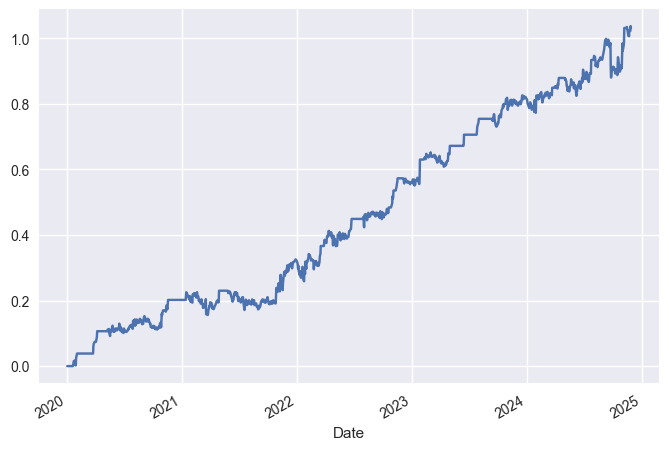

In [147]:
trading_df["CumulativeReturn"].plot();

In [148]:
ticker_1[-1] 

C:\Users\wqwph\AppData\Local\Temp\ipykernel_98112\1784034232.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticker_1[-1]


1.7058086396170764

In [149]:
ticker_2[-1]

C:\Users\wqwph\AppData\Local\Temp\ipykernel_98112\3296754307.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ticker_2[-1]


1.804532000626439

In [150]:
from pyfolio import create_full_tear_sheet, create_simple_tear_sheet, create_returns_tear_sheet

c:\VirtualEnvironments\.venv_1\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.555%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2020-01-03
End date,2024-11-27
Total months,58
,Backtest
Annual return,15.555%
Cumulative returns,103.105%
Annual volatility,9.732%
Sharpe ratio,1.53
Calmar ratio,2.63
Stability,0.98
Max drawdown,-5.918%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.92,2024-09-09,2024-09-25,2024-11-06,43
1,5.68,2021-02-18,2021-03-24,2021-04-29,51
2,5.04,2021-12-28,2022-01-24,2022-02-07,30
3,4.79,2021-05-26,2021-07-19,2021-10-28,112
4,3.65,2021-11-11,2021-11-17,2021-11-22,8


c:\VirtualEnvironments\.venv_1\Lib\site-packages\pyfolio\plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


Stress Events,mean,min,max
Covid,0.06%,-3.85%,3.71%


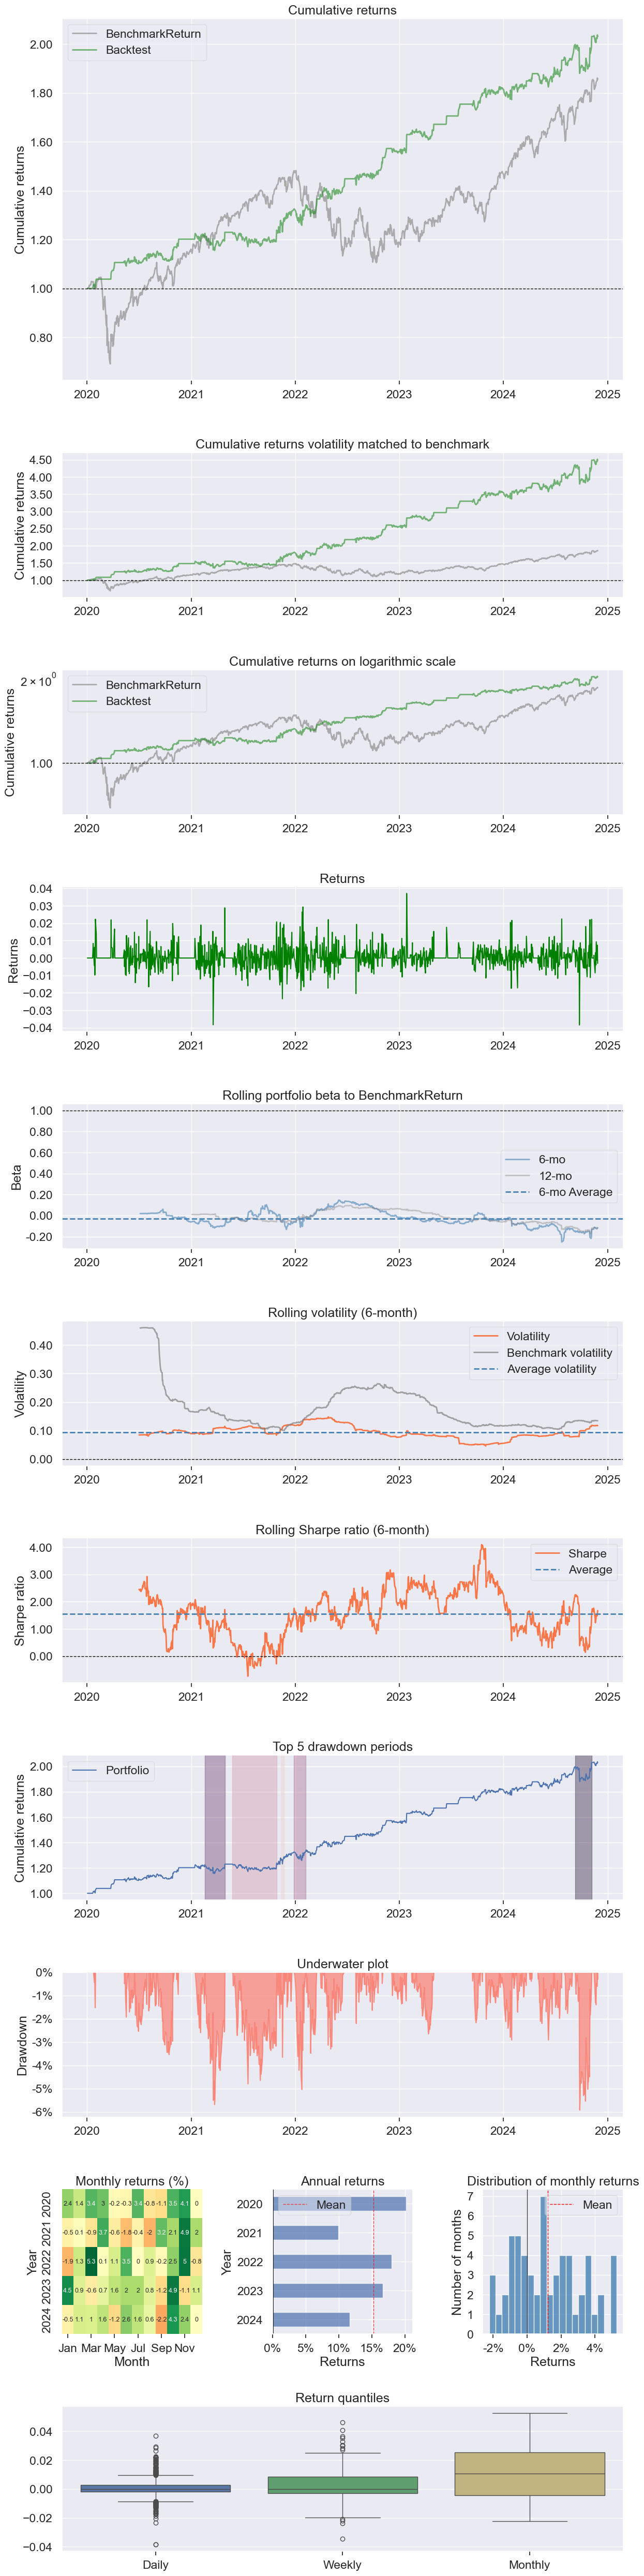

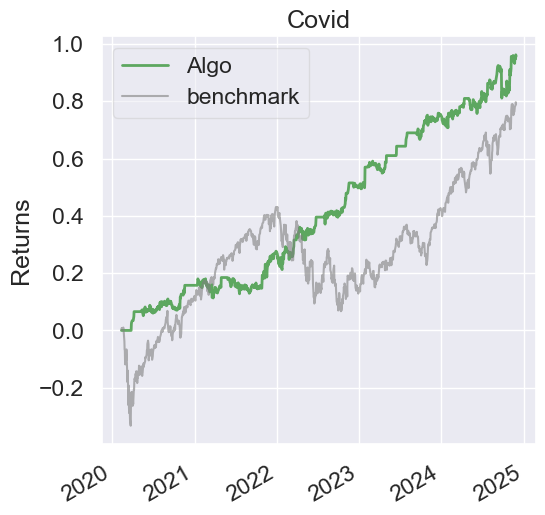

In [151]:
create_full_tear_sheet(trading_df["PortfolioReturn"], benchmark_rets=trading_df["BenchmarkReturn"])

$\sigma_{eq}$

$ISHARES U.S. TREASURY BOND ETF (GOVT): possibly delisted; no timezone found


<Axes: xlabel='Date'>

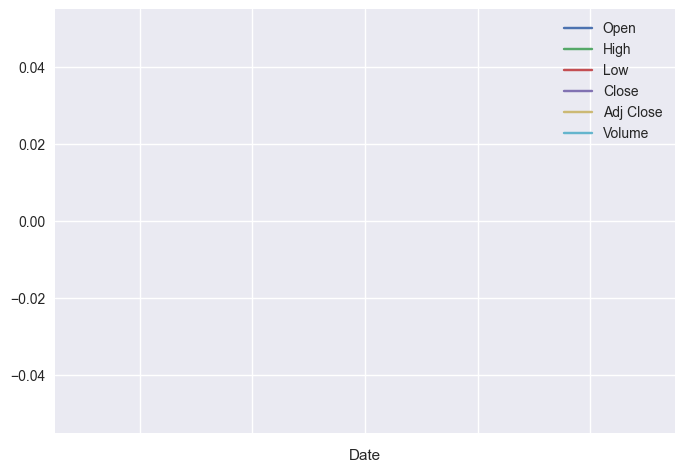

In [152]:
# risk free rate construction

rf_ticker = "iShares U.S. Treasury Bond ETF (GOVT)"
rf = yf.Ticker(rf_ticker)
rf = rf.history(start=start_date, end=end_date)
rf.plot()


In [153]:
import yfinance as yf
import pandas as pd

# Define tickers for S&P 500 (SPY as ETF) and the risk-free rate (e.g., 1-month T-bill)
ticker_spy = 'SPY'  # S&P 500 ETF
ticker_rf = '^IRX'  # 1-month T-bill rate

# Download data from Yahoo Finance
start_date = '2010-01-01'
end_date = '2025-01-01'

# Get adjusted closing prices for SPY (S&P 500)
df_spy = yf.download(ticker_spy, start=start_date, end=end_date)['Adj Close']

# Get 1-month T-Bill rates (risk-free rate)
df_rf = yf.download(ticker_rf, start=start_date, end=end_date)['Adj Close']

df_rf

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2010-01-04    0.055
2010-01-05    0.060
2010-01-06    0.045
2010-01-07    0.045
2010-01-08    0.040
              ...  
2024-12-24    4.200
2024-12-26    4.215
2024-12-27    4.178
2024-12-30    4.182
2024-12-31    4.208
Name: Adj Close, Length: 3772, dtype: float64

In [154]:
# Resample the risk-free rate to daily data (assuming the risk-free rate is constant within each month)
df_rf = df_rf / 100  # Convert to decimal (e.g., 2% = 0.02)

Date
2010-01-05    0.002647
2010-01-06    0.000704
2010-01-07    0.004221
2010-01-08    0.003328
2010-01-11    0.001397
                ...   
2024-12-24    0.011115
2024-12-26    0.000067
2024-12-27   -0.010527
2024-12-30   -0.011412
2024-12-31   -0.003638
Name: Adj Close, Length: 3773, dtype: float64

Date
2010-01-04    0.000002
2010-01-05    0.000002
2010-01-06    0.000002
2010-01-07    0.000002
2010-01-08    0.000002
                ...   
2024-12-24    0.000167
2024-12-26    0.000167
2024-12-27    0.000166
2024-12-30    0.000166
2024-12-31    0.000167
Name: Adj Close, Length: 3772, dtype: float64

Date
2010-01-04         NaN
2010-01-05    0.002644
2010-01-06    0.000702
2010-01-07    0.004220
2010-01-08    0.003326
Name: Adj Close, dtype: float64


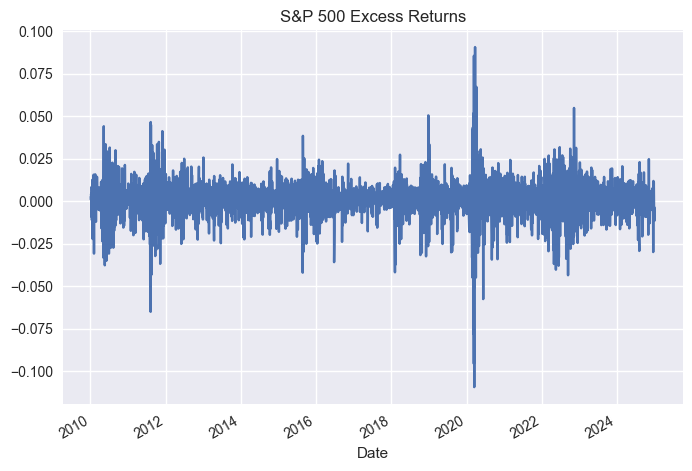

In [155]:

# Calculate daily returns for SPY
df_spy_returns = df_spy.pct_change().dropna()

display(df_spy_returns)

# Calculate the daily risk-free rate (assuming daily compounding)
df_rf_daily = df_rf / 252  # Convert annual rate to daily (assuming 252 trading days per year)

display(df_rf_daily)

# Calculate excess returns: S&P 500 returns - risk-free rate
df_excess_returns = df_spy_returns - df_rf_daily

# Print the first few rows
print(df_excess_returns.head())

# Optionally, you can visualize the excess returns
import matplotlib.pyplot as plt

df_excess_returns.plot(title="S&P 500 Excess Returns")
plt.show()

In [156]:
df_rf_daily

Date
2010-01-04    0.000002
2010-01-05    0.000002
2010-01-06    0.000002
2010-01-07    0.000002
2010-01-08    0.000002
                ...   
2024-12-24    0.000167
2024-12-26    0.000167
2024-12-27    0.000166
2024-12-30    0.000166
2024-12-31    0.000167
Name: Adj Close, Length: 3772, dtype: float64

c:\VirtualEnvironments\.venv_1\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.555%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2020-01-03
End date,2024-11-27
Total months,58
,Backtest
Annual return,15.555%
Cumulative returns,103.105%
Annual volatility,9.732%
Sharpe ratio,1.53
Calmar ratio,2.63
Stability,0.98
Max drawdown,-5.918%


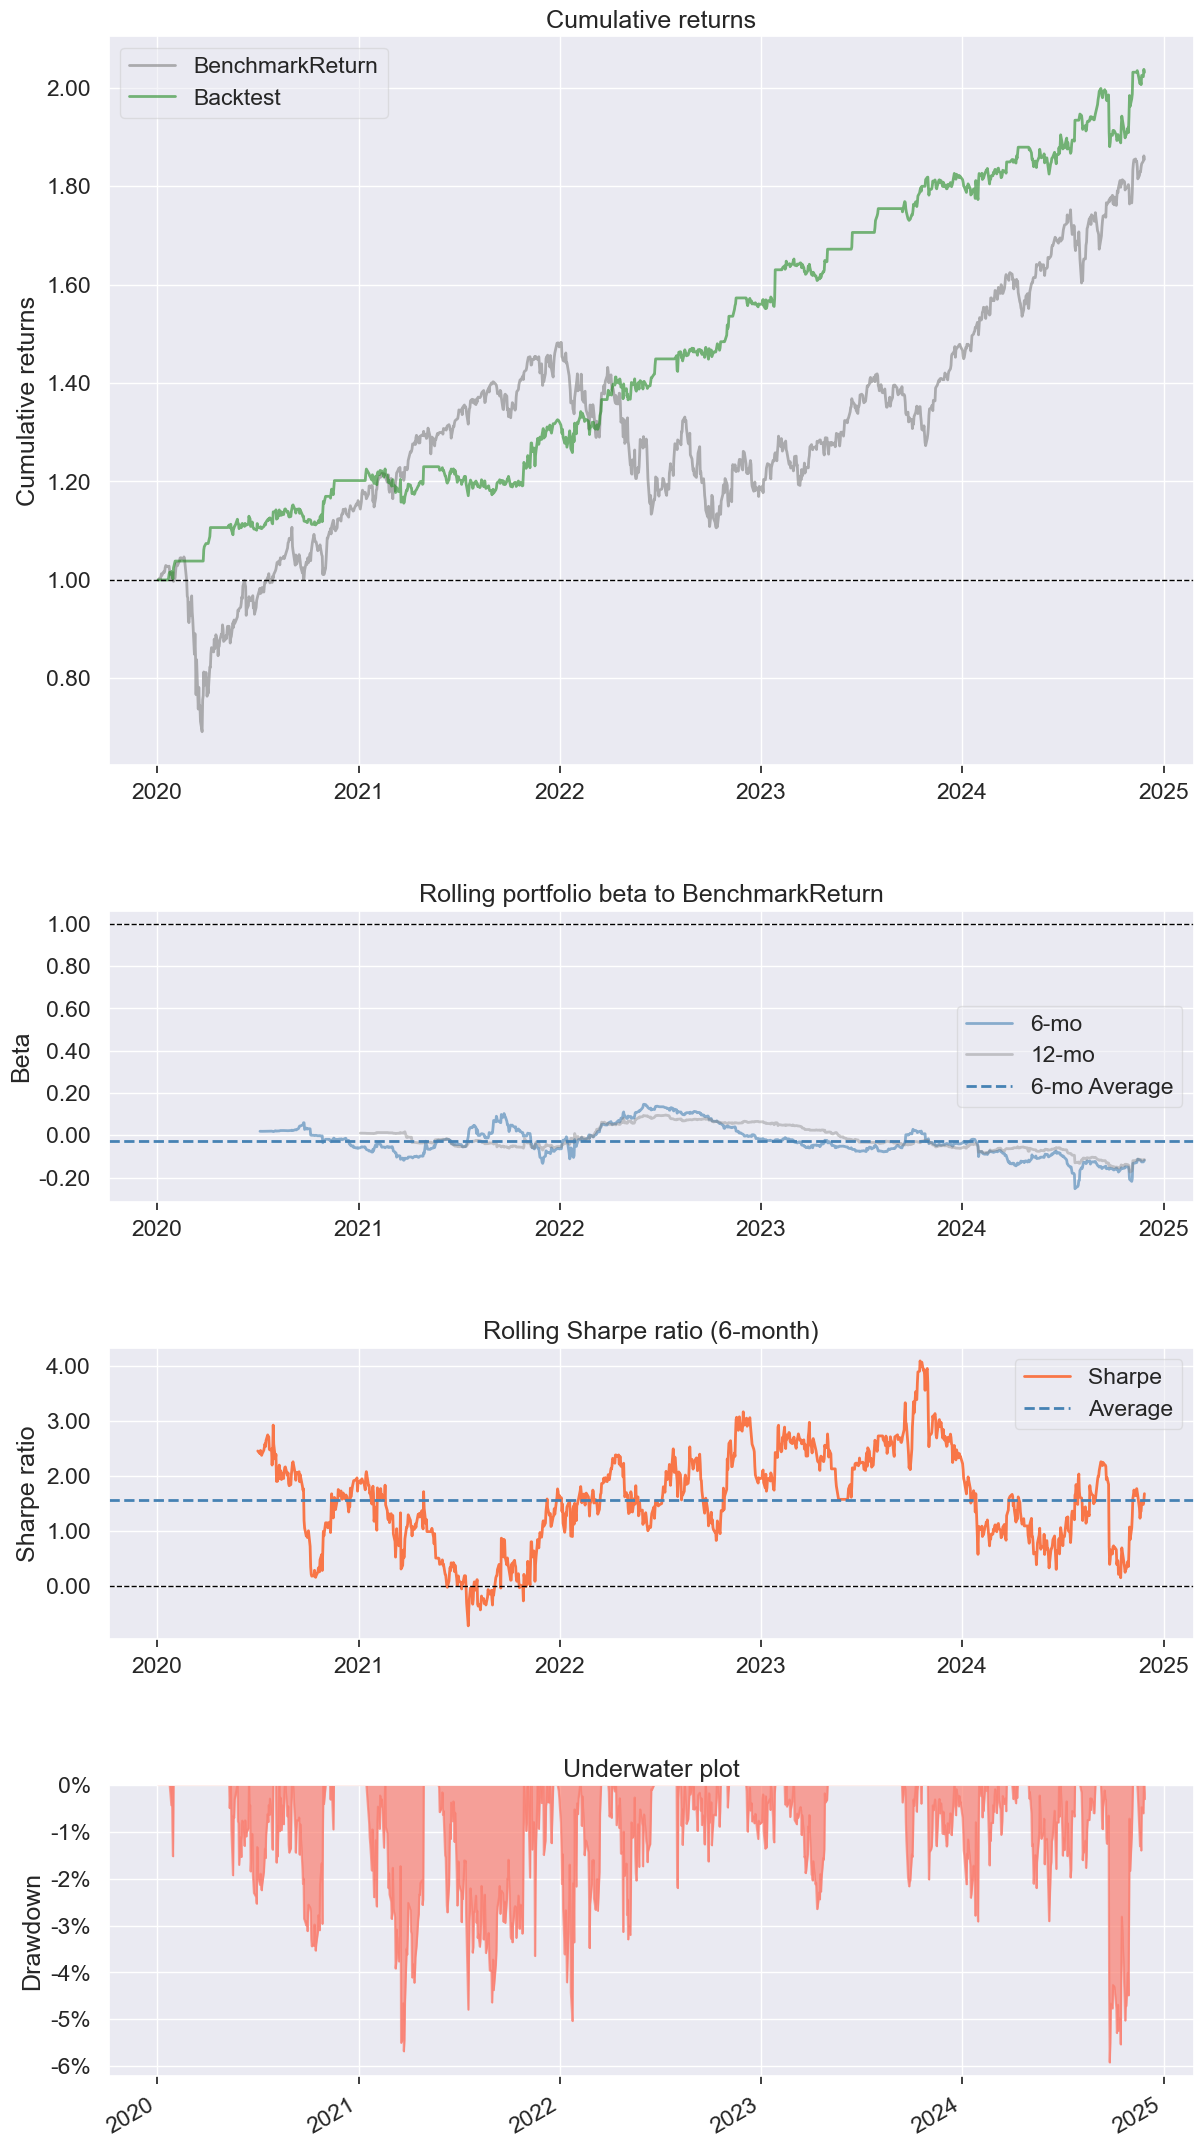

In [157]:
create_simple_tear_sheet(trading_df["PortfolioReturn"], benchmark_rets=trading_df["BenchmarkReturn"])

In [158]:
(trading_df.index < "2020-01-04").sum()

1

c:\VirtualEnvironments\.venv_1\Lib\site-packages\pyfolio\plotting.py:670: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.555%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100, 3)) + "%"


Start date,2020-01-03
End date,2024-11-27
Total months,58
,Backtest
Annual return,15.555%
Cumulative returns,103.105%
Annual volatility,9.732%
Sharpe ratio,1.53
Calmar ratio,2.63
Stability,0.98
Max drawdown,-5.918%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,5.92,2024-09-09,2024-09-25,2024-11-06,43
1,5.68,2021-02-18,2021-03-24,2021-04-29,51
2,5.04,2021-12-28,2022-01-24,2022-02-07,30
3,4.79,2021-05-26,2021-07-19,2021-10-28,112
4,3.65,2021-11-11,2021-11-17,2021-11-22,8


c:\VirtualEnvironments\.venv_1\Lib\site-packages\pyfolio\plotting.py:1407: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Daily", "Weekly", "Monthly"])


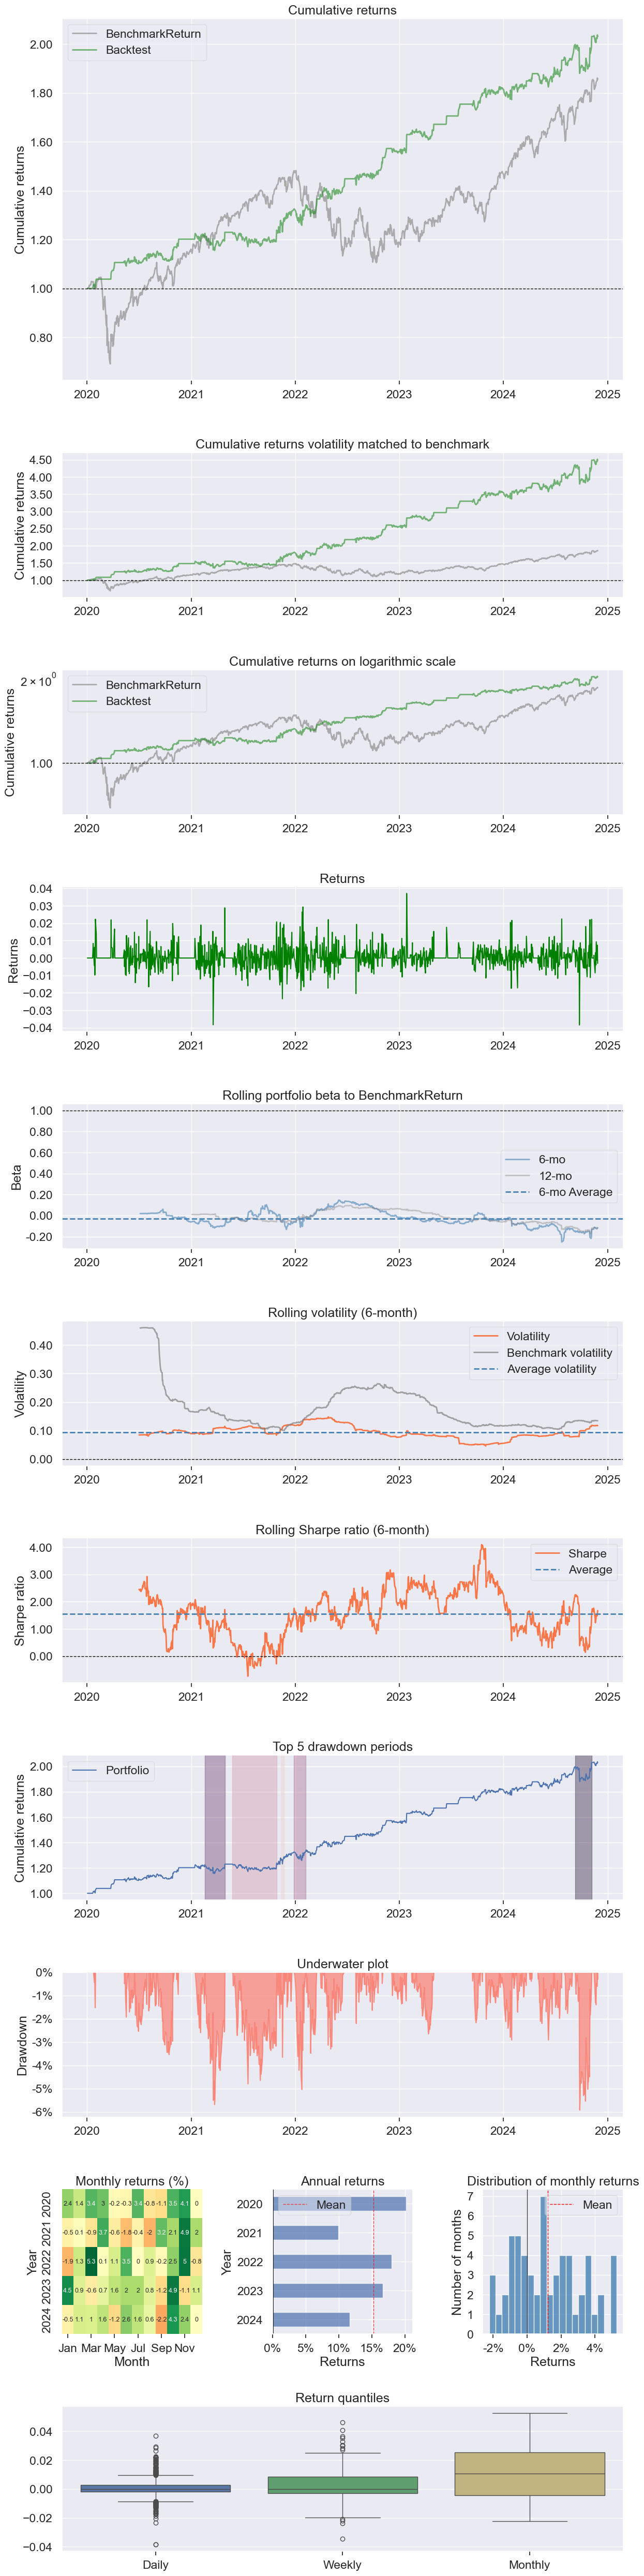

In [159]:
create_returns_tear_sheet(trading_df["PortfolioReturn"], benchmark_rets=trading_df["BenchmarkReturn"])

In [160]:
trading_df["PortfolioReturn"].mean()

0.0005926303453808037

In [177]:
# VAR stuff
from vector_autoregressive_model import VectorAutoRegressiveModel
import yfinance as yf

VAR = VectorAutoRegressiveModel()

start_date = "2020-01-01"
end_date = "2024-12-29"
ticker_1 = yf.Ticker("^SPX").history(start=start_date, end=end_date)
ticker_2 = yf.Ticker("MA").history(start=start_date, end=end_date)
ticker_3 = yf.Ticker("V").history(start=start_date, end=end_date)